<a href="https://colab.research.google.com/github/DavidGoing/PHYS3151-Machine-Learning-in-Physics-2024/blob/main/support-vector-machine/support-vector-machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM)

The problem SVM addresses is the same as that of Logistic Regression, only that SVM uses a different algorithm to seperate the two groups. In this notebook, we will use the same data as in the logistic regression to try to show the similarities and differences.

## Example 1

<table><tr>
Source link:https://www.kaggle.com/uciml/pima-indians-diabetes-database

<br>Recall that the objective of this data is to predict the chances of Diabetes from health parameters like glucose, blood pressure, etc. This data is all taken from Pima Indians females of over 21 years old.

### Data

Like in Logistic Regression, we import the data into a pandas dataframe and have a look.

In [ ]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
!git clone https://github.com/DavidGoing/PHYS3151-Machine-Learning-in-Physics-2024


fatal: destination path 'hku_phys3151_2022' already exists and is not an empty directory.


In [ ]:
df = pd.read_csv("/content/PHYS3151-Machine-Learning-in-Physics-2024/support-vector-machine/support-vector-machine-example-1.csv", sep=",")
print (df)

     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]


Then we define 'X', which is the design matrix, and 'y' which is the target vector.

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

Next, since we need to both train and test the model, we separate the data into two parts as follows.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.70)

### SVM Implementation

First, we get the fit using sklearn package.

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

Then, we make predictions of the test set to evaluate the model

In [ ]:
y_pred = svclassifier.predict(X_test)

Two tools for evaluation:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[302  54]
 [ 69 113]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       356
           1       0.68      0.62      0.65       182

    accuracy                           0.77       538
   macro avg       0.75      0.73      0.74       538
weighted avg       0.77      0.77      0.77       538



First, we have to figure out the meaning of each element in the confusion_matrix: [1,1] is True Positives; [1,2] is False Negatives; [2,1] is False Positives; [2,2] is True Negatives. As the result turns out, in test set, there are [1,1]+[1,2] positives and [1,1] of which are correctly predicted; [2,1]+[2,2] negatives and [2,2] of which are correctly predicted.
<br><br>Then, look into the report. For quick review on separate results of positives and negatives separately, we can look at precision and recall:

<br>1. Precision:
<br>for example, $positive\ Precision = True\ Positives/(True\ Positives + False\ Positives)$， which means the correct rate of the predictions within predicted positives.

<br>2. Recall:
<br> $positive\ Recall = True\ Positives/(True\ Positives + False\ Negatives)$, which means the correct rate of the prediction within the actual positives.
<br><br>For example, in this case, we're predicting the chances of diabetes. If our focus is on predicting as many people as possible who may have diabetes, then we should care more about the value of 'Recall'. If our focus is to minimize the error rate of people who are predicted to have diabetes, we care more about the value of 'Precision'.
<br><br>3. Macro avg refers to arithmatic mean, while weighted avg refers to weighted average, of the two above in the same column.
<br>
<br>For total test, we can directly check accuracy: $Accuracy = True\ values / All\ Values $

In this case, the model created is not a very good one, as the accuracy of the model shown in the classification report matrix above is just around 80%, especially for the negative values since nearly half of them are mispredicted.

## Example 2

Just like in the logistic regression notebook, in the second example, an algorithm written from scratch will be used to provide insight into the inner workings of SVM.

### Data Preparation

Data source: https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset/data
<br><br>Recall that we try to predict whether a given person will have a coronary heart disease in the next 10 years given various parameters like sex, age, eduction, blood pressure, BMI, etc.

Still, import the data and have a view again.

In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import random

df = pd.read_csv("/content/PHYS3151-Machine-Learning-in-Physics-2024/support-vector-machine/support-vector-machine-example-2.csv", sep=",")
df = df.apply(lambda x: x.fillna(random.choice(x.dropna())), axis=1)

print(df)

      male   age  education  ...  heartRate  glucose  TenYearCHD
0      1.0  39.0        4.0  ...       80.0     77.0         0.0
1      0.0  46.0        2.0  ...       95.0     76.0         0.0
2      1.0  48.0        1.0  ...       75.0     70.0         0.0
3      0.0  61.0        3.0  ...       65.0    103.0         1.0
4      0.0  46.0        3.0  ...       85.0     85.0         0.0
...    ...   ...        ...  ...        ...      ...         ...
4233   1.0  50.0        1.0  ...       66.0     86.0         1.0
4234   1.0  51.0        3.0  ...       65.0     68.0         0.0
4235   0.0  48.0        2.0  ...       84.0     86.0         0.0
4236   0.0  44.0        1.0  ...       86.0      0.0         0.0
4237   0.0  52.0        2.0  ...       80.0    107.0         0.0

[4238 rows x 16 columns]


Set design matrix and target vector.

In [ ]:
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

Just like before, we must scale and normalize the data.

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=list(X.columns.values))
print(X_scaled.shape)
print(scaler)

(4238, 15)
RobustScaler()


In [ ]:
X = X_scaled

In [ ]:
X = X.to_numpy()
y = y.to_numpy()
y = y.reshape((len(y),1))
n = X.shape[1]+1

This specific algorithm for SVM works only when $y \in \{1,-1\}$, so we need to change all the 0s in y to -1s. And for X, we need to add a column as well.

In [ ]:
y = np.where(y==0,-1.,1.)

In [ ]:
X_b = np.c_[np.ones((len(X),1)),X]
theta = np.random.random((n,1))

### Function Preparation

In SVM, the cost function has changed, and of which hinge loss defined below is important for maximum-margin classification. It means, if correctly classfied, the loss is 0.
<br>To compute the cost, we keep the constant $m$ here and still use $\lambda$($\frac{1}{C}$), so the cost is $cost\ =\ \frac{\lambda}{2m}\sum_j\theta_j^2+\frac{1}{m}L$ , where $L$ denotes the loss function and here we take hinge loss.

In [ ]:
def hinge(X,y,theta):                        #for maximum-margin classification
    pred = 1 - np.multiply(y,(X.dot(theta)))
    loss = np.maximum(np.zeros(pred.shape),pred)
    hinge = np.sum(loss)
    return hinge

def computeCost(X,y,theta,reg=0):
    m = float(len(y))
    theta2 = np.square(theta)
    cost = (reg/(2*m)) * np.sum(theta2) + (1/m) * hinge(X,y,theta)
    return cost

When we are trying to optimize $\theta$s, however, since the hinge function is not differentiable, instead of the derivative, the gradient descent will use the sub-derivative instead. The sub-derivative can be thought of as a generalization of the derivative and can be appplied to certain types of undifferentiable functions. In practice it looks like taking the derivative term-by-term，and $\alpha$ is designed to control the lenghth of each step.

<br>For details of subgradient:<br>While
$$
hinge\ loss =max(0,1-y(X.\theta))
$$
so for subgradient:<br>when$\ $   $y(X.\theta)<1$, it is ($\lambda\theta-yx$), or else, it is ($\lambda\theta$).
<br>After each step, $\theta_i+1=\theta_i-\alpha*subgradient$
<br><br>The difference with the gradient descent algorithm is that the sub-gradient algorithm is not a descent algorithm. Each time the parameter update does not guarantee that the cost function is monotonically decreasing. This will be shown in the figue below.

In [ ]:
def check(X,y,theta):
    X_b = np.c_[np.ones((len(X),1)),X]

    fx = np.multiply(y,(X_b.dot(theta)))

    check = np.less(fx,np.ones(fx.shape))

    check = np.where(check==True,1,0)

    return check

def subgradient_descent(X,y,theta,iterations=100,reg=0):
    '''
    X    = Matrix of X
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = float(y.shape[0])

    X_b = np.c_[np.ones((len(X),1)),X]

    cost_history = np.zeros(iterations)

    theta_history = np.zeros((iterations,X_b.shape[1]))

    for it in range(iterations):
        alpha = 1/(reg*(it+1))
        #print(X_b.shape)
        #print(X_b.dot(theta).shape)
        #print(np.multiply(y,(X_b.dot(theta))).shape)
        #print(y.shape)
        theta = theta + alpha*((np.multiply(check(X,y,theta),y)).T.dot(X_b)).T
        theta[1:] = theta[1:] - alpha*reg*theta[1:]
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(X_b,y,theta,reg)

    return theta, cost_history, theta_history

### Implementation

In [ ]:
reg = 1
n_iter = 20000
theta,cost_history,theta_history = subgradient_descent(X,y,theta,n_iter,reg)
print(theta)

[[-1.09361022e+00]
 [ 6.41682992e-03]
 [ 2.39594600e-02]
 [-2.96228818e-02]
 [-1.02214976e-03]
 [-1.66251718e-02]
 [-8.58768898e-02]
 [ 1.01589750e-01]
 [-1.08435168e-02]
 [ 5.39081836e-02]
 [-3.45331773e-03]
 [ 1.68363495e-02]
 [-1.47593393e-02]
 [ 1.50102601e-03]
 [-3.28512387e-03]
 [-1.00108887e-02]]


To have a better view of the cost_history, a plot of cost starting from 2000th iteration is also shown here.

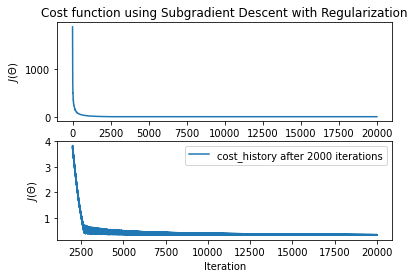

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(cost_history)
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Subgradient Descent with Regularization")
plt.subplot(212)
x2=list(range(2000,20000,1))
plt.plot(x2,cost_history[2000:],label='cost_history after 2000 iterations')
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.legend()
plt.show()

In [ ]:
print('Final Cost is :', cost_history[-1])

Final Cost is : 0.34302001677788874


As we mentioned above, the figure of cost_history after 2000 iterations showed exactly that subgradient method is not monotonically decreasing.

Compared with the result in logistic regression, SVM is better in this binary classification case.

## Example 3

With the same data, we still want to look at the decision boundary.
    <br>Data source:https://www.kaggle.com/chadansharma/logistic-regression-practice

### Data Preparation

In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import random

df = pd.read_csv("/content/PHYS3151-Machine-Learning-in-Physics-2024/support-vector-machine/support-vector-machine-example-3.csv", sep=",")

df = df.apply(lambda x: x.fillna(random.choice(x.dropna())), axis=1)

print(df)

     1st_exam   2nd_exam  admitted
0   34.623660  78.024693       0.0
1   30.286711  43.894998       0.0
2   35.847409  72.902198       0.0
3   60.182599  86.308552       1.0
4   79.032736  75.344376       1.0
..        ...        ...       ...
95  83.489163  48.380286       1.0
96  42.261701  87.103851       1.0
97  99.315009  68.775409       1.0
98  55.340018  64.931938       1.0
99  74.775893  89.529813       1.0

[100 rows x 3 columns]


Set design matrix and target vector.

In [ ]:
X = df.drop(columns=['admitted'])
y = df['admitted']

Likewise, we continue to do feature scaling.

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=list(X.columns.values))
print(X_scaled.shape)
print(scaler)

(100, 2)
RobustScaler()


In [ ]:
X = X_scaled

In [ ]:
X = X.to_numpy()
y = y.to_numpy()
y = y.reshape((len(y),1))
n = X.shape[1]+1

This specific algorithm for SVM works only when $y \in \{1,-1\}$, so we need to change all the 0s in y to -1s. And for X, we need to add a column as well.

In [ ]:
y = np.where(y==0,-1.,1.)

In [ ]:
X_b = np.c_[np.ones((len(X),1)),X]
theta = np.random.random((n,1))

### Function Preparation

As introduced above, we define the functions for cost and subgradient descent.

In [ ]:
def hinge(X,y,theta):                        #for maximum-margin classification
    pred = 1 - np.multiply(y,(X.dot(theta)))
    loss = np.maximum(np.zeros(pred.shape),pred)
    hinge = np.sum(loss)
    return hinge

def computeCost(X,y,theta,reg=0):
    m = float(len(y))
    theta2 = np.square(theta)
    cost = (reg/(2*m)) * np.sum(theta2) + (1/m) * hinge(X,y,theta)
    return cost

In [ ]:
def check(X,y,theta):
    X_b = np.c_[np.ones((len(X),1)),X]

    fx = np.multiply(y,(X_b.dot(theta)))

    check = np.less(fx,np.ones(fx.shape))

    check = np.where(check==True,1,0)

    return check

def subgradient_descent(X,y,theta,iterations=100,reg=0):
    '''
    X    = Matrix of X
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    alpha
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = float(y.shape[0])

    X_b = np.c_[np.ones((len(X),1)),X]

    cost_history = np.zeros(iterations)

    theta_history = np.zeros((iterations,X_b.shape[1]))

    for it in range(iterations):
        alpha = 1/(reg*(it+1))
        #print(X_b.shape)
        #print(X_b.dot(theta).shape)
        #print(np.multiply(y,(X_b.dot(theta))).shape)
        #print(y.shape)
        theta = theta + alpha*((np.multiply(check(X,y,theta),y)).T.dot(X_b)).T
        theta[1:] = theta[1:] - alpha*reg*theta[1:]
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(X_b,y,theta,reg)

    return theta, cost_history, theta_history

### Implementation

In [ ]:
reg = 1
n_iter = 20000
theta,cost_history,theta_history = subgradient_descent(X,y,theta,n_iter,reg)
print(theta)

[[1.05154542]
 [2.53390366]
 [2.38280955]]


### Decision Boundary

To distinguish whether the points signify admitted or not, separate the dataset into two subsets.

In [ ]:
#y=1 admitted(yes)
yes_x=[]
yes_y=[]
#y=0 not admitted(no)
no_x=[]
no_y=[]
for i in range(0,100):
    if y[i]== -1:
        dis=(theta[1]*X_b[i][1]+theta[2]*X_b[i][2]+theta[0])/np.sqrt(np.square(theta[1])+np.square(theta[2]))
        if dis <= -0.:
            no_x.append(X_b[i][1])
            no_y.append(X_b[i][2])
    else:
        dis=abs(theta[1]*X_b[i][1]+theta[2]*X_b[i][2]+theta[0])/np.sqrt(np.square(theta[1])+np.square(theta[2]))
        if dis >= 0.:
            yes_x.append(X_b[i][1])
            yes_y.append(X_b[i][2])

Different from that of logistic regression, we plot 3 lines here to clearly show the maximum margin of SVM.

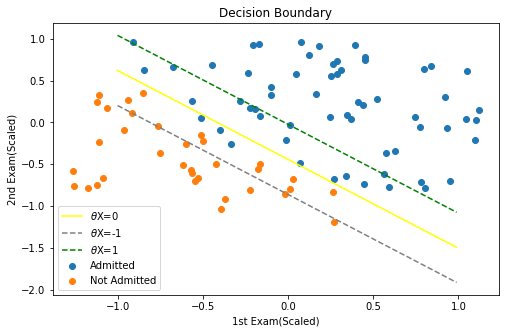

In [ ]:
plt.figure(figsize=(8,5))
plt.xlabel('1st Exam(Scaled)')
plt.ylabel('2nd Exam(Scaled)')
plt.title('Decision Boundary')
x=np.arange(-1,1,0.01)
y1=(-theta[1]/theta[2])*x+(-theta[0]/theta[2])#=0
y2=(-theta[1]/theta[2])*x+((-theta[0]-1)/theta[2])#=-1
y3=(-theta[1]/theta[2])*x+((-theta[0]+1)/theta[2])#=1
plt.plot(x,y1,label=r'$\theta$X=0',color='yellow' )
plt.plot(x,y2,label=r'$\theta$X=-1',linestyle='--',color='gray' )
plt.plot(x,y3,label=r'$\theta$X=1',linestyle='--' ,color='green')
plt.scatter(yes_x,yes_y,label='Admitted')
plt.scatter(no_x,no_y,label='Not Admitted')
plt.legend()

## Example 4

As the data in example 3 is not that optimal to observe the decision boundary, in this example, we try to design some better data to show how decision boundary works in SVM. Assume that according to two features, the results are split into two groups: type 1 and type 2.

### Data Preparation

First, prepare the data as we want.

In [ ]:
X=np.zeros([200,2])
y=np.zeros(200)
for i in range(0,100):
    rx=500*(np.random.rand())+100
    X[i][0]=rx
    ry=500-rx+(np.random.rand())*2000
    X[i][1]=ry
    y[i]=1
for i in range(100,200):
    rx=-500*(np.random.rand())-100
    X[i][0]=rx
    ry=-(500-rx+(np.random.rand())*2000)
    X[i][1]=ry
    y[i]=-1
print(type(X))

<class 'numpy.ndarray'>


### Data Preprocessing

Then we do feature scaling.

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X_scaled = scaler.fit_transform(X)
#X_scaled = pd.DataFrame(X_scaled,columns=list(X.columns.values))
X=X_scaled
y = y.reshape((len(y),1))
X_b = np.c_[np.ones((len(X),1)),X]
n=X_b.shape[1]
theta = np.random.random((n,1))

### Function Definition

We define the functions of SVM the same sa before, where we have explained in detail.

In [ ]:
def hinge(X,y,theta):                        #for maximum-margin classification
    pred = 1 - np.multiply(y,(X.dot(theta)))
    loss = np.maximum(np.zeros(pred.shape),pred)
    hinge = np.sum(loss)
    return hinge

def computeCost(X,y,theta,reg=0):
    m = float(len(y))
    theta2 = np.square(theta)
    reg =0
    cost = (reg/(2*m)) * np.sum(theta2) + (1/m) * hinge(X,y,theta)
    return cost

In [ ]:
def check(X,y,theta):
    X_b = np.c_[np.ones((len(X),1)),X]

    fx = np.multiply(y,(X_b.dot(theta)))

    check = np.less(fx,np.ones(fx.shape))

    check = np.where(check==True,1,0)

    return check

def subgradient_descent(X,y,theta,iterations=1000,reg2=1):
    '''
    X    = Matrix of X
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = float(y.shape[0])

    X_b = np.c_[np.ones((len(X),1)),X]

    cost_history = np.zeros(iterations)

    theta_history = np.zeros((iterations,X_b.shape[1]))

    for it in range(iterations):
        alpha = 1/(reg2*(it+1))
        #print(X_b.shape)
        #print(X_b.dot(theta).shape)
        #print(np.multiply(y,(X_b.dot(theta))).shape)
        #print(y.shape)
        theta = theta + alpha*((np.multiply(check(X,y,theta),y)).T.dot(X_b)).T
        theta[1:] = theta[1:] - alpha*reg2*theta[1:]
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(X_b,y,theta,reg)

    return theta, cost_history, theta_history

### SVM Implementation

In [ ]:
reg2 = 1
reg = 0
n_iter = 50000
theta,cost_history,theta_history = subgradient_descent(X,y,theta,n_iter,reg2)
print(theta)

[[-0.09344455]
 [ 1.95440197]
 [ 1.88124586]]


Again, separate the data into two groups according to the result type.

In [ ]:
#y=1 admitted(yes)
yes_x=[]
yes_y=[]
#y=0 not admitted(no)
no_x=[]
no_y=[]
for i in range(0,200):
    if y[i]== -1:
        no_x.append(X_b[i][1])
        no_y.append(X_b[i][2])
    else:
        yes_x.append(X_b[i][1])
        yes_y.append(X_b[i][2])

### Decision Boundary

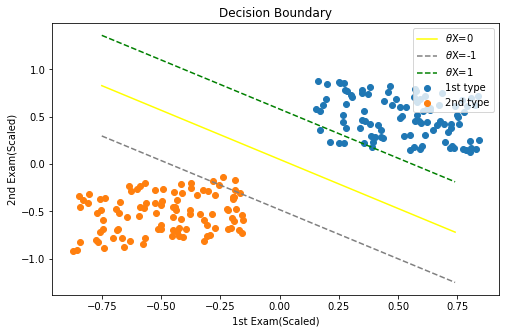

In [ ]:
plt.figure(figsize=(8,5))
plt.xlabel('1st Exam(Scaled)')
plt.ylabel('2nd Exam(Scaled)')
plt.title('Decision Boundary')
x=np.arange(-0.75,0.75,0.01)
y1=(-theta[1]/theta[2])*x+(-theta[0]/theta[2])#=0
y2=(-theta[1]/theta[2])*x+((-theta[0]-1)/theta[2])#=-1
y3=(-theta[1]/theta[2])*x+((-theta[0]+1)/theta[2])#=1
plt.plot(x,y1,label=r'$\theta$X=0',color='yellow' )
plt.plot(x,y2,label=r'$\theta$X=-1',linestyle='--',color='gray' )
plt.plot(x,y3,label=r'$\theta$X=1',linestyle='--' ,color='green')
plt.scatter(yes_x,yes_y,label='1st type')
plt.scatter(no_x,no_y,label='2nd type')
plt.legend()

Now we have got a clear view of how SVM make decision boundary with maximum margin

In [ ]:
cost_history

array([3.90187613e+01, 7.65590449e+00, 2.18935238e-03, ...,
       5.62494163e-03, 5.62499290e-03, 5.62493014e-03])

We can see that the cost doesn't converge to 0. This may be due to the finite iterations of subgradient.  However it is stressed that, in SVM, any seperate data sets can be completely divided by the decesion boundary accompanied with two margins.  We will show this by multiply the trained parameter by a factor multiplier.

In [ ]:
multiplier=1.5
theta=theta*multiplier
print(theta)

[[-0.14016682]
 [ 2.93160296]
 [ 2.82186878]]


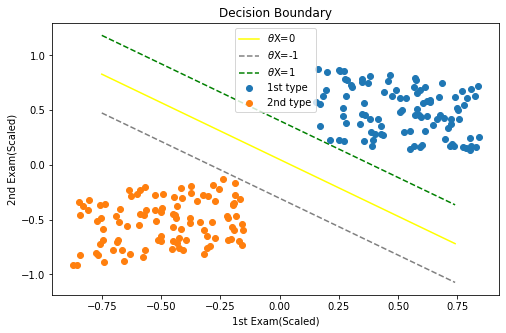

In [ ]:
plt.figure(figsize=(8,5))
plt.xlabel('1st Exam(Scaled)')
plt.ylabel('2nd Exam(Scaled)')
plt.title('Decision Boundary')
x=np.arange(-0.75,0.75,0.01)
y1=(-theta[1]/theta[2])*x+(-theta[0]/theta[2])#=0
y2=(-theta[1]/theta[2])*x+((-theta[0]-1)/theta[2])#=-1
y3=(-theta[1]/theta[2])*x+((-theta[0]+1)/theta[2])#=1
plt.plot(x,y1,label=r'$\theta$X=0',color='yellow' )
plt.plot(x,y2,label=r'$\theta$X=-1',linestyle='--',color='gray' )
plt.plot(x,y3,label=r'$\theta$X=1',linestyle='--' ,color='green')
plt.scatter(yes_x,yes_y,label='1st type')
plt.scatter(no_x,no_y,label='2nd type')
plt.legend()

Then you can see that the dataset is completly seperated by the margins.